## <center> Packages & Connection </center>

In [1]:
import os
import h3 as h3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pyhive import presto
from keplergl import KeplerGl
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

## <center> Local extracted files </center>

In [3]:
notebook_path = os.getcwd()
print(notebook_path)

/Users/rapido/code-repository/pricing/affluence


In [4]:
refined_hex_8_all_data = pd.read_csv('/Users/rapido/local-datasets/affluence/processed/hex_8_all_data_2023_07_10_to_16.csv')
refined_hex_8_hsr_yesh = pd.read_csv('/Users/rapido/local-datasets/affluence/processed/hex_8_data_2023_07_10_to_16.csv')

In [5]:
print(refined_hex_8_all_data.shape)
print(refined_hex_8_hsr_yesh.shape)

(4032, 29)
(30, 29)


In [6]:
link_hex_8_all_data = refined_hex_8_all_data[refined_hex_8_all_data['service_name'].isin(['Link'])]
link_hex_8_hsr_yesh = refined_hex_8_hsr_yesh[refined_hex_8_hsr_yesh['service_name'].isin(['Link'])]
link_hex_8_all_data.columns

Index(['city', 'service_name', 'pickup_cluster', 'pickup_hex_8',
       'fe_cus_count', 'fe_count', 'requested_orders', 'cobrm',
       'expiry_mapped', 'cobra', 'accepted_orders', 'ocara', 'net_orders',
       'aor', 'fe2rr', 'fe2net', 'taxi_high_income', 'taxi_medium_income',
       'taxi_low_income', 'link_only_service', 'auto_only_service',
       'both_service', 'link_ps', 'link_nps', 'auto_ps', 'auto_nps',
       'fe_intent_stable', 'fe_intent_increasing', 'fe_intent_declining'],
      dtype='object')

In [7]:
link_hex_8_all_data.describe()

,fe_cus_count,fe_count,requested_orders,cobrm,expiry_mapped,cobra,accepted_orders,ocara,net_orders,aor,fe2rr,fe2net,taxi_high_income,taxi_medium_income,taxi_low_income,link_only_service,auto_only_service,both_service,link_ps,link_nps,auto_ps,auto_nps,fe_intent_stable,fe_intent_increasing,fe_intent_declining
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1998.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1025.482741,3759.492246,675.464232,2.057529,40.968984,131.326663,502.478739,111.851426,271.029515,62.354354,18.061531,5.417709,404.630815,272.687844,51.189095,98.815408,144.536268,645.574287,139.452726,245.380190,221.260130,363.391696,337.763882,403.431216,170.871436
std,2103.330224,8212.575206,1432.721151,3.915677,120.463644,314.321455,1026.933039,232.362412,557.164357,29.021819,8.953372,3.944067,894.232561,537.595619,96.525761,189.521964,292.914341,1383.512775,281.119674,520.950135,486.036235,773.491357,678.963273,848.749936,377.831765
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,62.500000,8.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,50.000000,14.000000,2.000000,5.000000,5.000000,1.000000,3.000000,2.000000,8.000000,2.000000,3.000000,2.000000,4.000000,5.000000,6.000000,2.000000
50%,143.000000,453.000000,78.000000,1.000000,5.000000,13.000000,57.000000,16.000000,26.000000,73.000000,18.000000,6.000000,43.000000,39.000000,8.000000,19.000000,18.000000,70.000000,18.000000,28.000000,21.000000,40.000000,43.000000,49.000000,18.000000
75%,1090.500000,3643.000000,675.500000,3.000000,21.000000,101.000000,537.000000,118.000000,287.000000,82.000000,21.000000,8.000000,391.000000,308.500000,61.000000,118.000000,152.500000,655.500000,151.000000,244.500000,211.000000,364.000000,367.500000,415.000000,161.000000
max,25922.000000,100666.000000,14122.000000,77.000000,1368.000000,2937.000000,10310.000000,2898.000000,5596.000000,100.000000,100.000000,50.000000,12122.000000,6695.000000,1232.000000,2966.000000,3669.000000,17808.000000,3152.000000,6463.000000,6398.000000,10067.000000,8480.000000,10943.000000,4981.000000


In [8]:
link_hex_8_all_data['high_income_%'] = round(link_hex_8_all_data['taxi_high_income']*100/link_hex_8_all_data['fe_cus_count'])
link_hex_8_all_data['high_income_thrshld'] = link_hex_8_all_data['high_income_%'].median()

link_hex_8_all_data['link_only_service_%'] = round(link_hex_8_all_data['link_only_service']*100/link_hex_8_all_data['fe_cus_count'])
link_hex_8_all_data['auto_only_service_%'] = round(link_hex_8_all_data['auto_only_service']*100/link_hex_8_all_data['fe_cus_count'])

link_hex_8_all_data['link_ps_%'] = round(link_hex_8_all_data['link_ps']*100/link_hex_8_all_data['fe_cus_count'])
link_hex_8_all_data['link_ps_threshld'] = link_hex_8_all_data['link_ps_%'].median()


link_hex_8_all_data['affluence_hi_tag'] = np.where(
                link_hex_8_all_data['high_income_%'] <= link_hex_8_all_data['high_income_thrshld'] , 'Less', 
                'High')
link_hex_8_all_data['service_aff_tag'] = np.where(
                link_hex_8_all_data['link_only_service_%'] > link_hex_8_all_data['auto_only_service_%'] , 'Yes', 
                'No')
link_hex_8_all_data['link_ps_tag'] = np.where(
                link_hex_8_all_data['link_ps_%'] <= link_hex_8_all_data['link_ps_threshld'] , 'Less', 
                'High')

In [9]:
link_hex_8_all_data['high_income_%'].median()

32.0

In [10]:
link_hex_8_all_data['link_ps_%'].median()

13.0

In [11]:
link_hex_8_all_data

,city,service_name,pickup_cluster,pickup_hex_8,fe_cus_count,fe_count,requested_orders,cobrm,expiry_mapped,cobra,accepted_orders,ocara,net_orders,aor,fe2rr,fe2net,taxi_high_income,taxi_medium_income,taxi_low_income,link_only_service,auto_only_service,both_service,link_ps,link_nps,auto_ps,auto_nps,fe_intent_stable,fe_intent_increasing,fe_intent_declining,high_income_%,high_income_thrshld,link_only_service_%,auto_only_service_%,link_ps_%,link_ps_threshld,affluence_hi_tag,service_aff_tag,link_ps_tag
0,Bangalore,Link,Hoskote_BLR,8861893893fffff,40,48,2,0,0,0,0,0,0,0.0,4.0,0.0,10,8,0,5,7,15,4,6,3,7,10,11,4,25.0,32.0,12.0,18.0,10.0,13.0,Less,No,Less
2,Bangalore,Link,Attibele,8861893713fffff,112,268,21,2,1,10,8,4,2,38.0,8.0,1.0,23,20,5,12,7,35,7,9,13,13,25,24,4,21.0,32.0,11.0,6.0,6.0,13.0,Less,Yes,Less
3,Bangalore,Link,Attibele,88618936a7fffff,4,22,2,0,0,2,0,0,0,0.0,9.0,0.0,1,1,0,1,0,2,0,0,0,1,1,2,0,25.0,32.0,25.0,0.0,0.0,13.0,Less,Yes,Less
5,Bangalore,Link,Sarjapur,88618935ebfffff,11,57,9,4,0,0,4,2,2,44.0,16.0,4.0,5,1,2,1,1,7,1,3,0,2,2,4,3,45.0,32.0,9.0,9.0,9.0,13.0,High,No,Less
7,Bangalore,Link,Sarjapur,88618935e9fffff,1,1,1,0,1,0,1,0,0,100.0,100.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,32.0,0.0,0.0,0.0,13.0,Less,No,Less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Bangalore,Link,Bidadi,886014413dfffff,5,12,1,1,0,0,0,0,0,0.0,8.0,0.0,3,1,0,0,1,3,1,0,1,1,1,1,1,60.0,32.0,0.0,20.0,20.0,13.0,High,No,High
4021,Bangalore,Link,Bidadi,8860144135fffff,29,60,1,0,0,0,0,0,0,0.0,2.0,0.0,10,0,0,2,22,0,0,0,0,1,17,2,0,34.0,32.0,7.0,76.0,0.0,13.0,High,No,Less
4022,Bangalore,Link,Bidadi,8860144125fffff,3,15,2,0,0,0,0,0,0,0.0,13.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,32.0,0.0,0.0,0.0,13.0,Less,No,Less
4024,Bangalore,Link,Bidadi,8860144113fffff,1,3,2,0,0,0,0,0,0,0.0,67.0,0.0,0,0,0,0,0,1,0,0,0,1,1,0,0,0.0,32.0,0.0,0.0,0.0,13.0,Less,No,Less


In [12]:
hex_8_all_data_link = link_hex_8_all_data [['city', 'pickup_cluster', 'pickup_hex_8', 'requested_orders',
                                            'high_income_%', 'high_income_thrshld', 'affluence_hi_tag',
                                            'link_only_service_%', 'auto_only_service_%', 'service_aff_tag',
                                            'link_ps_%', 'link_ps_threshld', 'link_ps_tag'
                                           ]]
hex_8_all_data_link['flag'] = np.where(
                                    link_hex_8_all_data['affluence_hi_tag'].isin(['Less'])
                                    &
                                    link_hex_8_all_data['service_aff_tag'].isin(['Yes'])
                                    &
                                    link_hex_8_all_data['link_ps_tag'].isin(['Less']),
                                    'Low Aff',
                                    'High Aff'
                                    )
hex_8_all_data_link

,city,pickup_cluster,pickup_hex_8,requested_orders,high_income_%,high_income_thrshld,affluence_hi_tag,link_only_service_%,auto_only_service_%,service_aff_tag,link_ps_%,link_ps_threshld,link_ps_tag,flag
0,Bangalore,Hoskote_BLR,8861893893fffff,2,25.0,32.0,Less,12.0,18.0,No,10.0,13.0,Less,High Aff
2,Bangalore,Attibele,8861893713fffff,21,21.0,32.0,Less,11.0,6.0,Yes,6.0,13.0,Less,Low Aff
3,Bangalore,Attibele,88618936a7fffff,2,25.0,32.0,Less,25.0,0.0,Yes,0.0,13.0,Less,Low Aff
5,Bangalore,Sarjapur,88618935ebfffff,9,45.0,32.0,High,9.0,9.0,No,9.0,13.0,Less,High Aff
7,Bangalore,Sarjapur,88618935e9fffff,1,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Bangalore,Bidadi,886014413dfffff,1,60.0,32.0,High,0.0,20.0,No,20.0,13.0,High,High Aff
4021,Bangalore,Bidadi,8860144135fffff,1,34.0,32.0,High,7.0,76.0,No,0.0,13.0,Less,High Aff
4022,Bangalore,Bidadi,8860144125fffff,2,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff
4024,Bangalore,Bidadi,8860144113fffff,2,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff


In [13]:
cluster_high_low = hex_8_all_data_link.groupby(['pickup_cluster','affluence_hi_tag','service_aff_tag', 'link_ps_tag', 'flag']).agg({ 'pickup_hex_8' : 'nunique'}).reset_index()
cluster_high_low

,pickup_cluster,affluence_hi_tag,service_aff_tag,link_ps_tag,flag,pickup_hex_8
0,AECS Layout Brookefield,High,No,High,High Aff,1
1,Adugodi,High,No,Less,High Aff,2
2,Adugodi Traffic Station,High,No,High,High Aff,1
3,Agara Lake,High,No,High,High Aff,2
4,Akshaynagar,High,No,High,High Aff,1
...,...,...,...,...,...,...
592,Yeshwanthpur,High,No,Less,High Aff,2
593,Yeshwanthpur,High,Yes,Less,High Aff,1
594,Yeshwanthpur,Less,Yes,High,High Aff,2
595,Yeshwanthpur,Less,Yes,Less,Low Aff,1


In [14]:
hex_8_all_data_link.groupby(['flag']) \
                        .agg({ 'pickup_hex_8' : 'nunique', 'requested_orders' : 'sum'}).reset_index()

,flag,pickup_hex_8,requested_orders
0,High Aff,1659,1309648
1,Low Aff,340,40605


In [15]:
df_distr = hex_8_all_data_link.groupby(['pickup_cluster']) \
                                .agg({ 'affluence_hi_tag' : 'nunique', 
                                      'service_aff_tag' : 'nunique',
                                      'pickup_hex_8' : 'nunique'}).reset_index()
df_distr

,pickup_cluster,affluence_hi_tag,service_aff_tag,pickup_hex_8
0,AECS Layout Brookefield,1,1,1
1,Adugodi,1,1,2
2,Adugodi Traffic Station,1,1,1
3,Agara Lake,1,1,2
4,Akshaynagar,1,1,4
5,Akshaynagar Lake,1,1,1
6,Anepalya,2,1,2
7,Anjanapura,2,2,9
8,Arekere,1,1,1
9,Arekere Extension,1,1,2


In [16]:
merge_df = pd.merge(
                    df_distr[df_distr['affluence_hi_tag'].isin([1])],
                    cluster_high_low,
                    how= 'left',
                    left_on = ['pickup_cluster'],
                    right_on = ['pickup_cluster']
                    )
merge_df    

,pickup_cluster,affluence_hi_tag_x,service_aff_tag_x,pickup_hex_8_x,affluence_hi_tag_y,service_aff_tag_y,link_ps_tag,flag,pickup_hex_8_y
0,AECS Layout Brookefield,1,1,1,High,No,High,High Aff,1
1,Adugodi,1,1,2,High,No,Less,High Aff,2
2,Adugodi Traffic Station,1,1,1,High,No,High,High Aff,1
3,Agara Lake,1,1,2,High,No,High,High Aff,2
4,Akshaynagar,1,1,4,High,No,High,High Aff,1
5,Akshaynagar,1,1,4,High,No,Less,High Aff,3
6,Akshaynagar Lake,1,1,1,High,No,Less,High Aff,1
7,Arekere,1,1,1,High,No,Less,High Aff,1
8,Arekere Extension,1,1,2,High,No,Less,High Aff,2
9,Arekere Lake,1,1,1,High,No,Less,High Aff,1


In [17]:
v2_merge_df = pd.merge(
                    hex_8_all_data_link,
                    merge_df,
                    how= 'left',
                    left_on = ['pickup_cluster'],
                    right_on = ['pickup_cluster']
                    )
v2_merge_df 

,city,pickup_cluster,pickup_hex_8,requested_orders,high_income_%,high_income_thrshld,affluence_hi_tag,link_only_service_%,auto_only_service_%,service_aff_tag,link_ps_%,link_ps_threshld,link_ps_tag_x,flag_x,affluence_hi_tag_x,service_aff_tag_x,pickup_hex_8_x,affluence_hi_tag_y,service_aff_tag_y,link_ps_tag_y,flag_y,pickup_hex_8_y
0,Bangalore,Hoskote_BLR,8861893893fffff,2,25.0,32.0,Less,12.0,18.0,No,10.0,13.0,Less,High Aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bangalore,Attibele,8861893713fffff,21,21.0,32.0,Less,11.0,6.0,Yes,6.0,13.0,Less,Low Aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bangalore,Attibele,88618936a7fffff,2,25.0,32.0,Less,25.0,0.0,Yes,0.0,13.0,Less,Low Aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bangalore,Sarjapur,88618935ebfffff,9,45.0,32.0,High,9.0,9.0,No,9.0,13.0,Less,High Aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bangalore,Sarjapur,88618935e9fffff,1,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,Bangalore,Bidadi,886014413dfffff,1,60.0,32.0,High,0.0,20.0,No,20.0,13.0,High,High Aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2208,Bangalore,Bidadi,8860144135fffff,1,34.0,32.0,High,7.0,76.0,No,0.0,13.0,Less,High Aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2209,Bangalore,Bidadi,8860144125fffff,2,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210,Bangalore,Bidadi,8860144113fffff,2,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
v2_merge_df.columns

Index(['city', 'pickup_cluster', 'pickup_hex_8', 'requested_orders',
       'high_income_%', 'high_income_thrshld', 'affluence_hi_tag',
       'link_only_service_%', 'auto_only_service_%', 'service_aff_tag',
       'link_ps_%', 'link_ps_threshld', 'link_ps_tag_x', 'flag_x',
       'affluence_hi_tag_x', 'service_aff_tag_x', 'pickup_hex_8_x',
       'affluence_hi_tag_y', 'service_aff_tag_y', 'link_ps_tag_y', 'flag_y',
       'pickup_hex_8_y'],
      dtype='object')

In [19]:
kepler_test = v2_merge_df [['city', 'pickup_cluster', 'pickup_hex_8', 'high_income_%',
       'high_income_thrshld', 'affluence_hi_tag', 'affluence_hi_tag_y']]
kepler_test.rename(columns = {'affluence_hi_tag' : 'hi_tag_hex_level',
                              'affluence_hi_tag_y' : 'hi_tag_cluster_level'
                             }, inplace = True)
kepler_test['hi_tag_cluster_level'] = np.where(kepler_test['hi_tag_cluster_level'].isin(['High','Less']) , kepler_test['hi_tag_cluster_level'], 'Both')

In [20]:
kepler_test

,city,pickup_cluster,pickup_hex_8,high_income_%,high_income_thrshld,hi_tag_hex_level,hi_tag_cluster_level
0,Bangalore,Hoskote_BLR,8861893893fffff,25.0,32.0,Less,Both
1,Bangalore,Attibele,8861893713fffff,21.0,32.0,Less,Both
2,Bangalore,Attibele,88618936a7fffff,25.0,32.0,Less,Both
3,Bangalore,Sarjapur,88618935ebfffff,45.0,32.0,High,Both
4,Bangalore,Sarjapur,88618935e9fffff,0.0,32.0,Less,Both
...,...,...,...,...,...,...,...
2207,Bangalore,Bidadi,886014413dfffff,60.0,32.0,High,Both
2208,Bangalore,Bidadi,8860144135fffff,34.0,32.0,High,Both
2209,Bangalore,Bidadi,8860144125fffff,0.0,32.0,Less,Both
2210,Bangalore,Bidadi,8860144113fffff,0.0,32.0,Less,Both


In [21]:
df_distr.groupby(['affluence_hi_tag']).agg({ 'pickup_hex_8' : 'count'}).reset_index()

,affluence_hi_tag,pickup_hex_8
0,1,151
1,2,78


## Yesh vs HSR

In [22]:
link_hex_8_hsr_yesh['high_income_%'] = round(link_hex_8_hsr_yesh['taxi_high_income']*100/link_hex_8_hsr_yesh['fe_cus_count'])
link_hex_8_hsr_yesh['link_only_%'] = round(link_hex_8_hsr_yesh['link_only_service']*100/link_hex_8_hsr_yesh['fe_cus_count'])
link_hex_8_hsr_yesh['both_service_%'] = round(link_hex_8_hsr_yesh['both_service']*100/link_hex_8_hsr_yesh['fe_cus_count'])
link_hex_8_hsr_yesh['link_nps_%'] = round(link_hex_8_hsr_yesh['link_nps']*100/link_hex_8_hsr_yesh['fe_cus_count'])
link_hex_8_hsr_yesh['auto_ps_%'] = round(link_hex_8_hsr_yesh['auto_ps']*100/link_hex_8_hsr_yesh['fe_cus_count'])
link_hex_8_hsr_yesh['auto_nps_%'] = round(link_hex_8_hsr_yesh['auto_nps']*100/link_hex_8_hsr_yesh['fe_cus_count'])

In [23]:
hex_8_hsr_yesh_link = link_hex_8_hsr_yesh [['city', 'service_name', 'pickup_cluster', 'pickup_hex_8',
                                 'high_income_%', 'link_only_%', 'both_service_%',
                                  'link_nps_%', 'auto_ps_%', 'auto_nps_%' ]]

In [24]:
hex_8_hsr_yesh_link[hex_8_hsr_yesh_link['pickup_cluster'].isin(['HSR'])].describe()

,high_income_%,link_only_%,both_service_%,link_nps_%,auto_ps_%,auto_nps_%
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,46.333333,6.000000,72.166667,28.000000,27.333333,41.166667
std,3.669696,1.549193,1.169045,0.632456,1.861899,2.136976
min,40.000000,5.000000,70.000000,27.000000,24.000000,37.000000
25%,45.000000,5.000000,72.000000,28.000000,27.000000,41.250000
50%,48.000000,5.500000,72.500000,28.000000,27.500000,42.000000
75%,48.000000,6.000000,73.000000,28.000000,28.750000,42.000000
max,50.000000,9.000000,73.000000,29.000000,29.000000,43.000000


In [25]:
hex_8_hsr_yesh_link[hex_8_hsr_yesh_link['pickup_cluster'].isin(['Yeshwanthpur']) & 
                    hex_8_hsr_yesh_link['pickup_hex_8'].isin(['8860145959fffff'])].describe()

,high_income_%,link_only_%,both_service_%,link_nps_%,auto_ps_%,auto_nps_%
count,1.0,1.0,1.0,1.0,1.0,1.0
mean,35.0,9.0,61.0,22.0,20.0,32.0
std,NaN,NaN,NaN,NaN,NaN,NaN
min,35.0,9.0,61.0,22.0,20.0,32.0
25%,35.0,9.0,61.0,22.0,20.0,32.0
50%,35.0,9.0,61.0,22.0,20.0,32.0
75%,35.0,9.0,61.0,22.0,20.0,32.0
max,35.0,9.0,61.0,22.0,20.0,32.0


## WIP

In [26]:
hex_8_all_data_link

,city,pickup_cluster,pickup_hex_8,requested_orders,high_income_%,high_income_thrshld,affluence_hi_tag,link_only_service_%,auto_only_service_%,service_aff_tag,link_ps_%,link_ps_threshld,link_ps_tag,flag
0,Bangalore,Hoskote_BLR,8861893893fffff,2,25.0,32.0,Less,12.0,18.0,No,10.0,13.0,Less,High Aff
2,Bangalore,Attibele,8861893713fffff,21,21.0,32.0,Less,11.0,6.0,Yes,6.0,13.0,Less,Low Aff
3,Bangalore,Attibele,88618936a7fffff,2,25.0,32.0,Less,25.0,0.0,Yes,0.0,13.0,Less,Low Aff
5,Bangalore,Sarjapur,88618935ebfffff,9,45.0,32.0,High,9.0,9.0,No,9.0,13.0,Less,High Aff
7,Bangalore,Sarjapur,88618935e9fffff,1,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Bangalore,Bidadi,886014413dfffff,1,60.0,32.0,High,0.0,20.0,No,20.0,13.0,High,High Aff
4021,Bangalore,Bidadi,8860144135fffff,1,34.0,32.0,High,7.0,76.0,No,0.0,13.0,Less,High Aff
4022,Bangalore,Bidadi,8860144125fffff,2,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff
4024,Bangalore,Bidadi,8860144113fffff,2,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff


In [27]:
hex_8_all_data_link

,city,pickup_cluster,pickup_hex_8,requested_orders,high_income_%,high_income_thrshld,affluence_hi_tag,link_only_service_%,auto_only_service_%,service_aff_tag,link_ps_%,link_ps_threshld,link_ps_tag,flag
0,Bangalore,Hoskote_BLR,8861893893fffff,2,25.0,32.0,Less,12.0,18.0,No,10.0,13.0,Less,High Aff
2,Bangalore,Attibele,8861893713fffff,21,21.0,32.0,Less,11.0,6.0,Yes,6.0,13.0,Less,Low Aff
3,Bangalore,Attibele,88618936a7fffff,2,25.0,32.0,Less,25.0,0.0,Yes,0.0,13.0,Less,Low Aff
5,Bangalore,Sarjapur,88618935ebfffff,9,45.0,32.0,High,9.0,9.0,No,9.0,13.0,Less,High Aff
7,Bangalore,Sarjapur,88618935e9fffff,1,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,Bangalore,Bidadi,886014413dfffff,1,60.0,32.0,High,0.0,20.0,No,20.0,13.0,High,High Aff
4021,Bangalore,Bidadi,8860144135fffff,1,34.0,32.0,High,7.0,76.0,No,0.0,13.0,Less,High Aff
4022,Bangalore,Bidadi,8860144125fffff,2,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff
4024,Bangalore,Bidadi,8860144113fffff,2,0.0,32.0,Less,0.0,0.0,No,0.0,13.0,Less,High Aff


<Axes: ylabel='Frequency'>

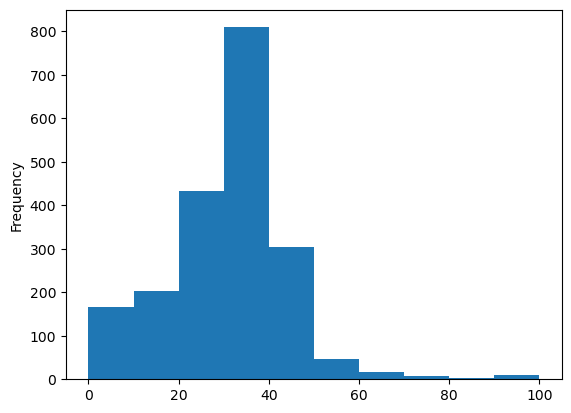

In [28]:
hex_8_all_data_link['high_income_%'].plot(kind='hist')

In [ ]:
link_hex_8_all_data['link_only_%'] = round(link_hex_8_all_data['link_only_service']*100/link_hex_8_all_data['fe_cus_count'])
link_hex_8_all_data['link_only_thrshld'] = link_hex_8_all_data['link_only_%'].median()
link_hex_8_all_data['both_service_%'] = round(link_hex_8_all_data['both_service']*100/link_hex_8_all_data['fe_cus_count'])
link_hex_8_all_data['both_service_thrshld'] = link_hex_8_all_data['both_service_%'].median()
link_hex_8_all_data['link_nps_%'] = round(link_hex_8_all_data['link_nps']*100/link_hex_8_all_data['fe_cus_count'])
link_hex_8_all_data['link_nps_thrshld'] = link_hex_8_all_data['link_nps_%'].median()
link_hex_8_all_data['auto_ps_%'] = round(link_hex_8_all_data['auto_ps']*100/link_hex_8_all_data['fe_cus_count'])
link_hex_8_all_data['auto_ps_thrshld'] = link_hex_8_all_data['auto_ps_%'].median()
link_hex_8_all_data['auto_nps_%'] = round(link_hex_8_all_data['auto_nps']*100/link_hex_8_all_data['fe_cus_count'])
link_hex_8_all_data['auto_nps_thrshld'] = link_hex_8_all_data['auto_nps_%'].median()